# Prototype for recursive squares

In [174]:
class Tiler:
    
    max_dim = None 
    
    def __init__ (self, origin, dim, parent=None):
        self.origin = origin
        self.dim = dim
        self.parent = parent
        self.children = []
        if self.level == 0:
            Tiler.max_dim = self.dim

    def __str__(self):
        s = '{}{} x {}\n'.format (' ' * (2 * self.level), self.dim, self.dim)
        for child in self.children: 
            s += str (child)
        return s
    
    def vertices(self, dim):
        
        top_left = self.origin[0], self.origin[1] + dim
        top_right = self.origin[0] + dim, self.origin[1] + dim
        bottom_right = self.origin[0] + dim, self.origin[1]
        
        return (self.origin, top_left, top_right, bottom_right)
        
    def split(self):
            
        if self.children: 
            raise Exception ('Already split')
        
        # split the axis
        half_dim = self.dim/2.
        
        # calculate new origins for sub-squares
        new_origins = self.vertices(half_dim)
        
        # create new tiles as children of current
        self.children = [Tiler(x0y0, half_dim, self) for x0y0 in new_origins]
        
    @property
    def level(self):
        return 0 if not self.parent else 1 + self.parent.level
    
    def splitUntilLevel(self, maxLevel):
        if maxLevel <= self.level: return 
        self.split()
        for child in self.children: 
            child.splitUntilLevel(maxLevel)
    
    @property
    def lvldim(self):
        return Tiler.max_dim if not self.parent else self.parent.lvldim/2
            
    def splitUntilDim(self, minDim):
        if minDim >= self.lvldim: 
            return self
        self.split()
        for child in self.children: 
            child.splitUntilDim(minDim)
    
    def yield_tiles(self):
        
        if self.is_leaf():
            yield (self.origin, self.dim)
        else:
            for child in self.children:
                for tile in child.yield_tiles():
                    yield tile
    
    def is_leaf(self):
        return not self.children        

In [182]:
tiles2 = Tiler((0,0), 20)
tiles2.splitUntilDim(2.025)

test = list(tiles2.yield_tiles())

for i, x in enumerate(test):
    if i < 10:
        print(x)

print("\nLength: {}".format(len(test)))

((0, 0), 1.25)
((0, 1.25), 1.25)
((1.25, 1.25), 1.25)
((1.25, 0), 1.25)
((0, 2.5), 1.25)
((0, 3.75), 1.25)
((1.25, 3.75), 1.25)
((1.25, 2.5), 1.25)
((2.5, 2.5), 1.25)
((2.5, 3.75), 1.25)

Length: 256


In [236]:
import numpy as np

tile_size = 10 
x_dim = np.arange(0, 200, tile_size)
y_dim = np.arange(0, 100, tile_size)

x_grid, y_grid = np.meshgrid(x_dim, y_dim)

In [237]:
coords = np.vstack((x_grid.ravel(), y_grid.ravel())).T

In [238]:
def grid_points(origin, dim):

    top_left = origin[0], origin[1] + dim
    top_right = origin[0] + dim, origin[1] + dim
    bottom_right = origin[0] + dim, origin[1]

    return [tuple(origin), top_left, top_right, bottom_right]

In [239]:
grid_verts = [grid_points(xy, tile_size) for xy in coords]

In [240]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
from shapely.geometry import Polygon

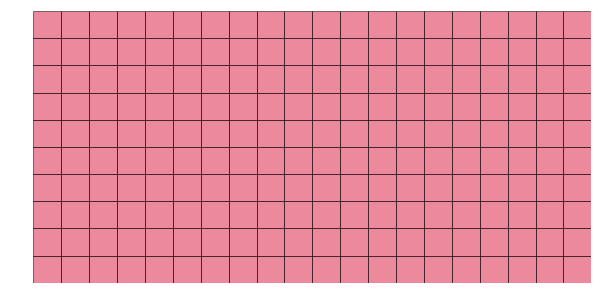

In [243]:
import random

plt.figure(figsize=(10, 5))

ax = plt.subplot(111)
for verts in grid_verts:
    p = PolygonPatch(Polygon(verts), fc='crimson', ec='black', alpha=0.5)
    ax.add_patch(p)
    
ax.set_xlim(0, 200)
ax.set_ylim(0, 100)
ax.axis('off')
    
plt.show()